In [1]:
# Importing the standard Python modules
import numpy as np
import pandas as pd
import sqlite3
# Importing a module that we created for data wrangling and statistical analysis
from functions import *

In [2]:
# Connecting the .sqlite file and reading it into a Pandas dataframe.
conn = sqlite3.connect('switrs.sqlite')

In [3]:
# Get all columns from "case_ids" database.
ids = pd.read_sql_query("select * from case_ids", conn)
ids_indexed = ids.set_index('case_id')
ids_indexed

,db_year
case_id,
0081715,2020
0726202,2020
3493128,2020
3495044,2020
3503560,2020
...,...
8066678,2016
8071228,2016
8112338,2016


In [4]:
# We are not interested in any variables in "collision" database.

In [5]:
# Get selected columns from "parties" database.
parties = pd.read_sql_query("select case_id, party_safety_equipment_1, party_safety_equipment_2, party_number_killed, party_number_injured, vehicle_year, vehicle_make from parties", conn)
parties_indexed = parties.set_index('case_id')
parties_indexed

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make
case_id,,,,,,
0081715,L,G,0,0,2007.0,FORD
0081715,M,G,0,0,2019.0,None
0726202,None,None,0,0,2005.0,None
3493128,None,None,0,0,NaN,None
3493128,M,G,0,0,2000.0,FREIGHTLINER
...,...,...,...,...,...,...
8121975,M,G,0,0,2016.0,JEEP
90219813,L,G,0,0,2012.0,FORD
90219813,M,G,0,1,2006.0,LEXS


In [6]:
# Get selected columns from "victims" database
victim = pd.read_sql_query("select case_id, victim_degree_of_injury, victim_role from victims", conn)
victim_indexed = victim.set_index('case_id')
victim_indexed

,victim_degree_of_injury,victim_role
case_id,,
3495044,no injury,2
3495044,no injury,2
3507861,no injury,2
3511283,other visible injury,1
3511287,other visible injury,5
...,...,...
8054630,other visible injury,4
8112338,complaint of pain,1
8121975,complaint of pain,1


In [7]:
# Merge ids_indexed dataframe with parties_index dataframe using index
merge_1 = parties_indexed.merge(ids_indexed, left_index = True, right_index = True)
merge_1

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make,db_year
case_id,,,,,,,
0000001,G,None,0,0,2000.0,FORD,2018
0000001,None,None,0,0,1992.0,BUICK,2018
0000002,None,None,0,0,NaN,TOYOTA,2018
0000003,G,None,0,0,1995.0,FORD,2018
0000003,None,None,0,0,NaN,None,2018
...,...,...,...,...,...,...,...
9870011226102009803,G,None,0,0,1994.0,CADILLAC,2018
9870011226102009803,G,None,0,2,1991.0,CHRYSLER,2018
9870011228210011458,B,None,0,0,NaN,CHEVROLET,2018


In [8]:
# Merge all three dataframes together using index
final_merge = merge_1.merge(victim_indexed, left_index = True, right_index = True)
final_merge

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make,db_year,victim_degree_of_injury,victim_role
case_id,,,,,,,,,
0000003,G,None,0,0,1995.0,FORD,2018,no injury,2
0000003,None,None,0,0,NaN,None,2018,no injury,2
0000005,G,None,0,1,2001.0,FREIGHTLINER,2018,severe injury,1
0000008,G,None,0,0,1997.0,DODGE,2018,no injury,2
0000008,G,None,0,0,1997.0,DODGE,2018,no injury,2
...,...,...,...,...,...,...,...,...,...
9870011231152508671,G,None,0,1,1991.0,CADILLAC,2018,no injury,6
9870011231152508671,G,None,0,2,1987.0,CHRYSLER,2018,complaint of pain,2
9870011231152508671,G,None,0,2,1987.0,CHRYSLER,2018,complaint of pain,1


In [9]:
# Select those Ford or Toyota manufactured vehicles only
ford_toyota_only = final_merge[final_merge.get('vehicle_make').str.contains('FORD') | final_merge.get('vehicle_make').str.contains('TOYOTA')]
ford_toyota_only

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make,db_year,victim_degree_of_injury,victim_role
case_id,,,,,,,,,
0000003,G,None,0,0,1995.0,FORD,2018,no injury,2
0000009,G,None,0,0,1985.0,FORD,2018,complaint of pain,2
0000009,G,None,0,0,1985.0,FORD,2018,no injury,2
0000014,G,None,0,0,2002.0,FORD,2018,other visible injury,1
0000014,G,None,0,0,2002.0,FORD,2018,complaint of pain,1
...,...,...,...,...,...,...,...,...,...
9870011212175013760,G,None,0,0,2001.0,FORD,2018,no injury,6
9870011212175013760,G,None,0,0,2001.0,FORD,2018,no injury,6
9870011221073514832,B,None,0,1,2000.0,FORD,2018,other visible injury,1


In [10]:
# Select from ford_toyota_only those cases that are of models later than or equal to 2000
ford_toyota_only_model_2000 = ford_toyota_only[ford_toyota_only.get('vehicle_year') >= 2000]
ford_toyota_only_model_2000

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make,db_year,victim_degree_of_injury,victim_role
case_id,,,,,,,,,
0000014,G,None,0,0,2002.0,FORD,2018,other visible injury,1
0000014,G,None,0,0,2002.0,FORD,2018,complaint of pain,1
0000026,M,None,0,2,2002.0,TOYOTA,2018,no injury,2
0000026,M,None,0,2,2002.0,TOYOTA,2018,no injury,2
0000026,M,None,0,2,2002.0,TOYOTA,2018,complaint of pain,2
...,...,...,...,...,...,...,...,...,...
9870011208124509803,G,None,0,0,2000.0,FORD,2018,no injury,6
9870011212175013760,G,None,0,0,2001.0,FORD,2018,no injury,6
9870011212175013760,G,None,0,0,2001.0,FORD,2018,no injury,6


In [11]:
# Select from ford_toyota_only_model_2000 only those cases that happened in 2018.
cases_in_2018 = ford_toyota_only_model_2000[ford_toyota_only_model_2000.get('db_year').str.contains('2018')]
cases_in_2018

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make,db_year,victim_degree_of_injury,victim_role
case_id,,,,,,,,,
0000014,G,None,0,0,2002.0,FORD,2018,other visible injury,1
0000014,G,None,0,0,2002.0,FORD,2018,complaint of pain,1
0000026,M,None,0,2,2002.0,TOYOTA,2018,no injury,2
0000026,M,None,0,2,2002.0,TOYOTA,2018,no injury,2
0000026,M,None,0,2,2002.0,TOYOTA,2018,complaint of pain,2
...,...,...,...,...,...,...,...,...,...
9870011208124509803,G,None,0,0,2000.0,FORD,2018,no injury,6
9870011212175013760,G,None,0,0,2001.0,FORD,2018,no injury,6
9870011212175013760,G,None,0,0,2001.0,FORD,2018,no injury,6


In [12]:
# Select from cases_in_2018 only those cases that involve victims who are either the driver or the passengers.
cases_involve_drivers_and_passengers = cases_in_2018[cases_in_2018.get('victim_role').str.contains('1') | cases_in_2018.get('victim_role').str.contains('2')]
cases_involve_drivers_and_passengers

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make,db_year,victim_degree_of_injury,victim_role
case_id,,,,,,,,,
0000014,G,None,0,0,2002.0,FORD,2018,other visible injury,1
0000014,G,None,0,0,2002.0,FORD,2018,complaint of pain,1
0000026,M,None,0,2,2002.0,TOYOTA,2018,no injury,2
0000026,M,None,0,2,2002.0,TOYOTA,2018,no injury,2
0000026,M,None,0,2,2002.0,TOYOTA,2018,complaint of pain,2
...,...,...,...,...,...,...,...,...,...
9870011107134416011,G,None,0,0,2000.0,FORD,2018,other visible injury,1
9870011107134416011,G,None,0,0,2000.0,FORD,2018,other visible injury,2
9870011107134416011,G,None,0,0,2000.0,FORD,2018,other visible injury,2


In [13]:
# Select from cases_involve_drivers_and_passengers only those cases where airbags are deployed for either party.
cases_air_bag = cases_involve_drivers_and_passengers[cases_involve_drivers_and_passengers.get('party_safety_equipment_1').str.contains('L') | cases_involve_drivers_and_passengers.get('party_safety_equipment_2').str.contains('L')]
cases_air_bag

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make,db_year,victim_degree_of_injury,victim_role
case_id,,,,,,,,,
0000089,G,L,0,1,2001.0,TOYOTA,2018,complaint of pain,1
0000089,G,L,0,1,2001.0,TOYOTA,2018,complaint of pain,1
0000177,L,None,0,2,2002.0,TOYOTA,2018,complaint of pain,1
0000177,L,None,0,2,2002.0,TOYOTA,2018,other visible injury,2
0000200,G,L,0,0,2000.0,FORD,2018,no injury,2
...,...,...,...,...,...,...,...,...,...
9865010619181014729,L,None,0,1,2000.0,FORD,2018,other visible injury,1
9865010629134015271,L,None,0,1,2001.0,TOYOTA,2018,complaint of pain,2
9865010914113512988,L,None,0,1,2001.0,TOYOTA,2018,other visible injury,1


In [14]:
# Use the assign_severity_level_score function from the functions module to translate victim's degree of injury to a numerical score.
degree_of_severity_score = assign_severity_level_score(cases_air_bag, 'victim_degree_of_injury')
degree_of_severity_score

array([1., 1., 1., ..., 2., 1., 2.])

In [15]:
# Add a column that contains the corresponding severity scores to each degree of the vitim's injury.
cases_air_bag_with_severity_score = cases_air_bag.assign(severity_score = degree_of_severity_score)
cases_air_bag_with_severity_score

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make,db_year,victim_degree_of_injury,victim_role,severity_score
case_id,,,,,,,,,,
0000089,G,L,0,1,2001.0,TOYOTA,2018,complaint of pain,1,1.0
0000089,G,L,0,1,2001.0,TOYOTA,2018,complaint of pain,1,1.0
0000177,L,None,0,2,2002.0,TOYOTA,2018,complaint of pain,1,1.0
0000177,L,None,0,2,2002.0,TOYOTA,2018,other visible injury,2,2.0
0000200,G,L,0,0,2000.0,FORD,2018,no injury,2,0.0
...,...,...,...,...,...,...,...,...,...,...
9865010619181014729,L,None,0,1,2000.0,FORD,2018,other visible injury,1,2.0
9865010629134015271,L,None,0,1,2001.0,TOYOTA,2018,complaint of pain,2,1.0
9865010914113512988,L,None,0,1,2001.0,TOYOTA,2018,other visible injury,1,2.0


In [16]:
# Using the sum_weighted_score function from the functions module to sum the overall severity score according the number of deaths, injured, and degree of severity.
sum_weighted_severity_score = sum_weighted_score(cases_air_bag_with_severity_score, 'party_number_killed', 'party_number_injured', 'severity_score')
sum_weighted_severity_score

array([1., 1., 2., ..., 2., 0., 2.])

In [17]:
# Assign a new column that contaisn the overal summed_weighted_score
cases_air_bag_with_summed_score = cases_air_bag_with_severity_score.assign(summed_weighted_score = sum_weighted_severity_score)
cases_air_bag_with_summed_score

,party_safety_equipment_1,party_safety_equipment_2,party_number_killed,party_number_injured,vehicle_year,vehicle_make,db_year,victim_degree_of_injury,victim_role,severity_score,summed_weighted_score
case_id,,,,,,,,,,,
0000089,G,L,0,1,2001.0,TOYOTA,2018,complaint of pain,1,1.0,1.0
0000089,G,L,0,1,2001.0,TOYOTA,2018,complaint of pain,1,1.0,1.0
0000177,L,None,0,2,2002.0,TOYOTA,2018,complaint of pain,1,1.0,2.0
0000177,L,None,0,2,2002.0,TOYOTA,2018,other visible injury,2,2.0,4.0
0000200,G,L,0,0,2000.0,FORD,2018,no injury,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9865010619181014729,L,None,0,1,2000.0,FORD,2018,other visible injury,1,2.0,2.0
9865010629134015271,L,None,0,1,2001.0,TOYOTA,2018,complaint of pain,2,1.0,1.0
9865010914113512988,L,None,0,1,2001.0,TOYOTA,2018,other visible injury,1,2.0,2.0


In [18]:
# Select only the Ford vehicles from cases_air_bag_with_summed_score and keep only the summed_weighted_score column.
scores_ford_vehicles_only = cases_air_bag_with_summed_score[cases_air_bag_with_summed_score.get('vehicle_make') == 'FORD'].get('summed_weighted_score')
scores_ford_vehicles_only

case_id
0000200                0.0
0000200                0.0
0000200                0.0
0000253                0.0
0000253                0.0
                      ... 
9865010425142515400    1.0
9865010619181014729    1.0
9865010619181014729    2.0
9865011018124509128    0.0
9870010418100009329    2.0
Name: summed_weighted_score, Length: 64859, dtype: float64

In [19]:
# Select only the Toyota vehicles from cases_air_bag_with_summed_score and keep only the summed_weighted_score column.
scores_toyota_vehicles_only = cases_air_bag_with_summed_score[cases_air_bag_with_summed_score.get('vehicle_make') == 'TOYOTA'].get('summed_weighted_score')
scores_toyota_vehicles_only

case_id
0000089                1.0
0000089                1.0
0000177                2.0
0000177                4.0
0001196                0.0
                      ... 
9860010926071413625    2.0
9860010926071413625    2.0
9860011230174513936    2.0
9865010629134015271    1.0
9865010914113512988    2.0
Name: summed_weighted_score, Length: 56486, dtype: float64

In [20]:
independent_samples_t(scores_ford_vehicles_only, scores_toyota_vehicles_only)

0.8959649746087779

In [22]:
# Double-check our result with stats tools from scipy. This would also give us a probability value.
from scipy import stats
stats.ttest_ind(scores_ford_vehicles_only, scores_toyota_vehicles_only)

Ttest_indResult(statistic=0.8959649746087779, pvalue=0.37027324744066525)

In [23]:
import matplotlib.pyplot as plt 

<ipython-input-32-380afb37ae80>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Ford's weighted severity of injury score", "Toyota's weighted severity of injury score"])


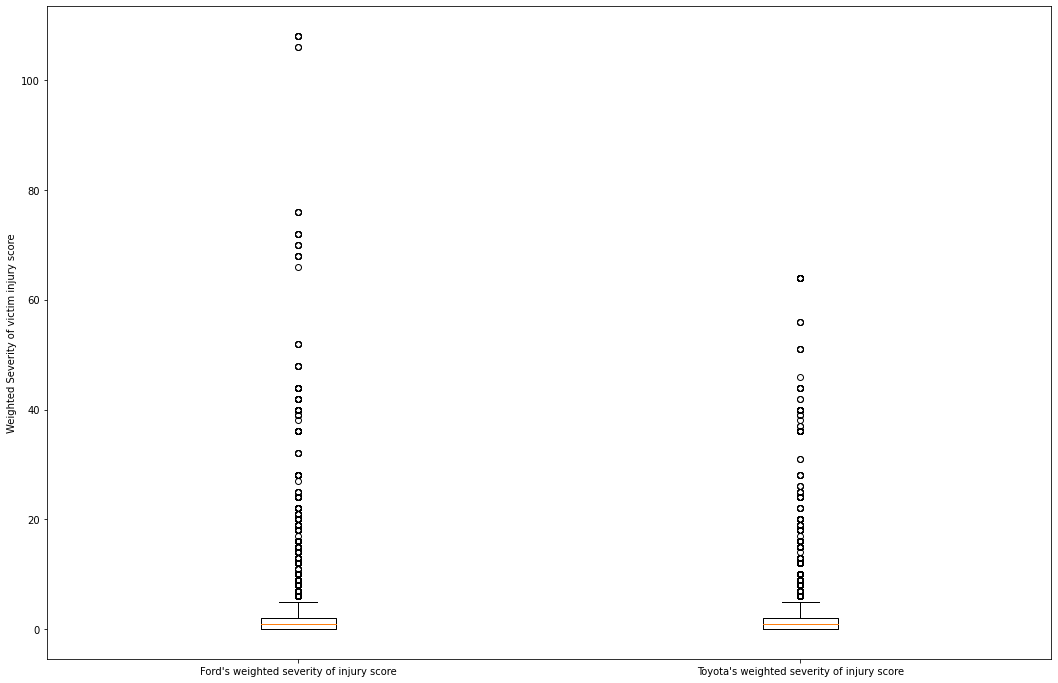

In [32]:
data_to_plot = [scores_ford_vehicles_only, scores_toyota_vehicles_only]
# Create a figure instance
fig = plt.figure(1, figsize=(18, 12))

# Create an axes instance and set x and y labels
ax = fig.add_subplot(111)
ax.set_xticklabels(["Ford's weighted severity of injury score", "Toyota's weighted severity of injury score"])
ax.set_ylabel("Weighted Severity of victim injury score")
# Create the boxplot
bp = ax.boxplot(data_to_plot)